In [11]:
import numpy as np
from hipposlam.utils import read_pickle
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

In [12]:


project_tag = 'avoidance'
data_dir = join('data', project_tag)

trajdata = read_pickle(join(data_dir, 'traj.pickle'))
metadata = read_pickle(join(data_dir, 'meta.pickle'))
stored_f = metadata['stored_f']
f_pos = metadata['pos']


trajdf = pd.DataFrame(trajdata)
trajdf['X_Nrow'] = trajdf['X'].apply(lambda x : x.shape[0])
print('Max x row ', trajdf['X_Nrow'].max())
trajdf



Max x row  53


,t,x,y,z,a,objID,X,X_Nrow
0,128,-3.913329,3.310060,0.053973,0.002249,"[2919, 2996, 9768]","[[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",3
1,256,-3.836468,3.310060,0.058338,0.001259,"[2919, 2996, 9768]","[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [...",3
2,384,-3.759622,3.310060,0.058849,0.000492,"[2919, 2996, 9768]","[[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [...",3
3,512,-3.682803,3.310060,0.059057,0.000192,"[2919, 2996, 9768]","[[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [...",3
4,640,-3.605996,3.310060,0.059142,0.000075,"[2919, 2996, 9768]","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [...",3
...,...,...,...,...,...,...,...,...
21116,2702976,5.010344,1.081195,0.059201,-2.426948,"[1757, 14198, 14864, 15649, 15670, 15691, 1571...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",53
21117,2703104,4.952334,1.030864,0.059201,-2.426948,"[1757, 14198, 14864, 15649, 15670, 15691, 1571...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",53
21118,2703232,4.894325,0.980533,0.059201,-2.426948,"[1757, 14198, 14864, 15649, 15670, 15691, 1571...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",53
21119,2703360,4.836316,0.930202,0.059201,-2.426948,"[1757, 14198, 14864, 15649, 15670, 15691, 1571...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",53


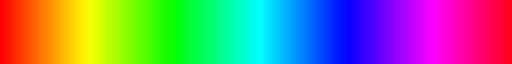

In [13]:
import matplotlib as mpl
from matplotlib import cm
norm = mpl.colors.Normalize(vmin=-np.pi, vmax=np.pi)

cmap = cm.hsv
cmap

In [17]:
Num_Fnodes = trajdf['X_Nrow'].max()

xdict = dict()
ydict = dict()
adict = dict()
fposdict = dict()
for i in range(trajdf.shape[0]):

    Xmat = trajdf['X'][i]
    x = trajdf['x'][i]
    y = trajdf['y'][i]
    a = trajdf['a'][i]
    active_rowIDs = np.where(np.sum(Xmat, axis=1) > 0)[0]

    for rowid in active_rowIDs:
        nodeID = [k for k, v in stored_f.items() if v == rowid][0]
        fposdict[rowid] = f_pos[nodeID]


        if rowid in xdict:
            xdict[rowid].append(x)
            ydict[rowid].append(y)
            adict[rowid].append(a)

        else:
            xdict[rowid] = [x]
            ydict[rowid] = [y]
            adict[rowid] = [a]




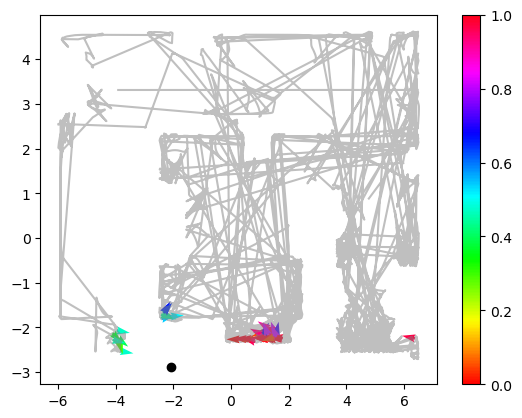

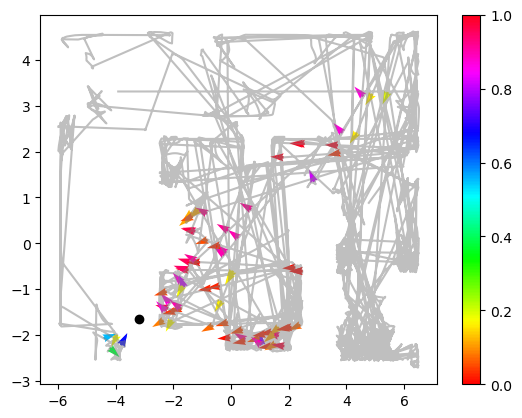

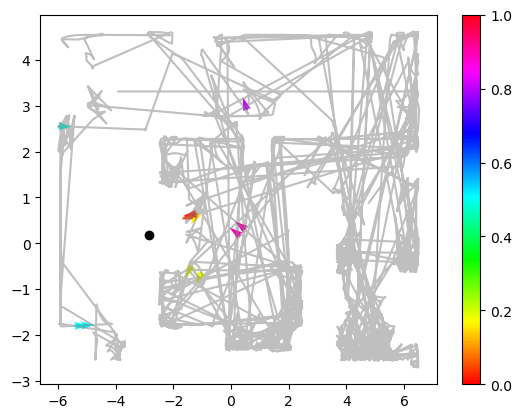

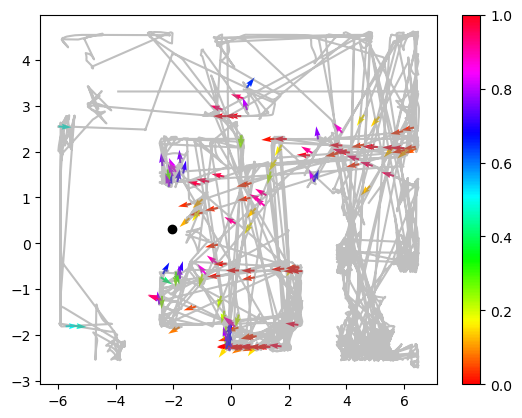

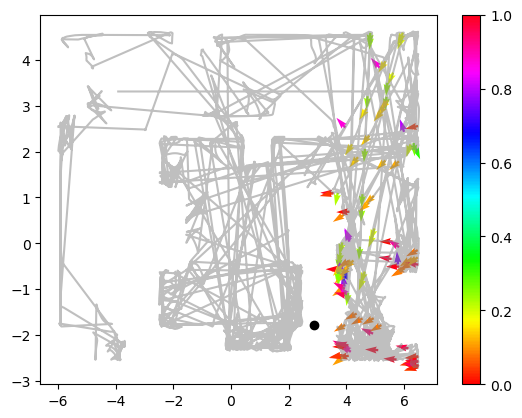

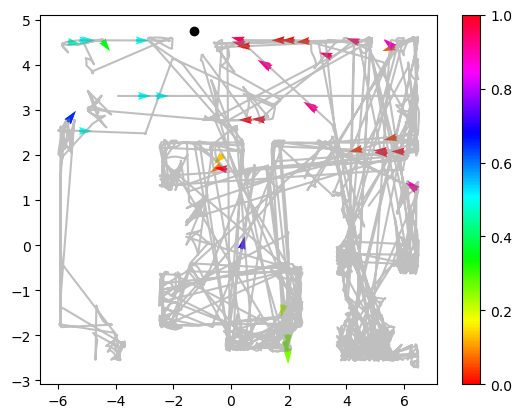

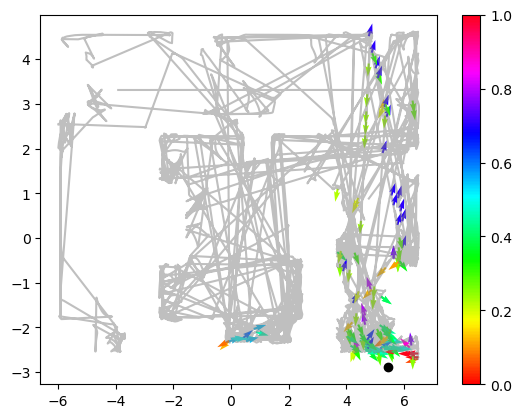

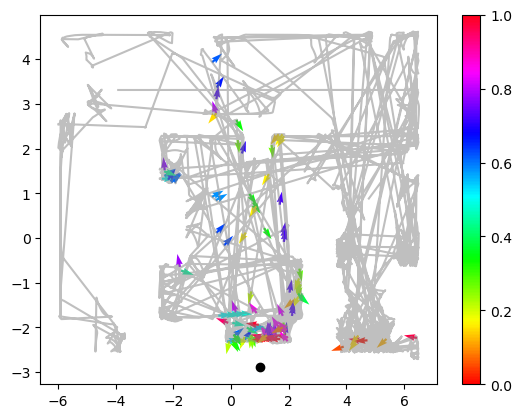

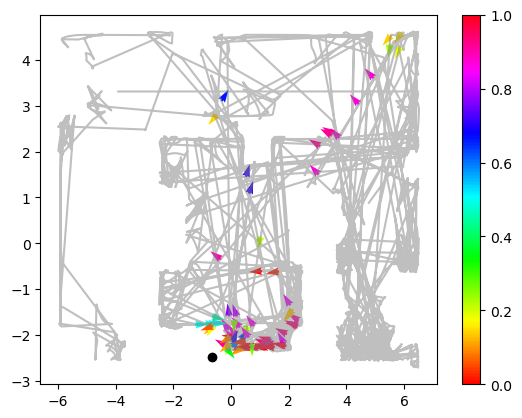

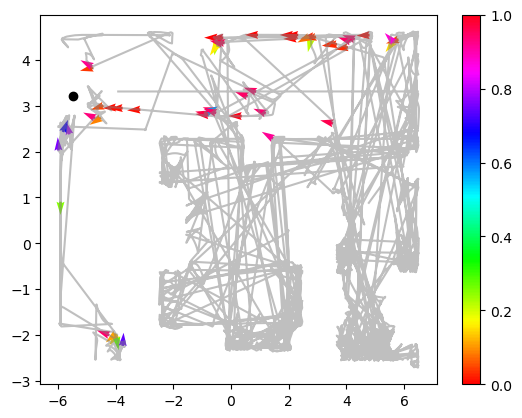

In [22]:
np.random.seed(0)
ivec = np.random.permutation(Num_Fnodes)
for i in ivec[:10]:
    N = len(xdict[i])
    frac = 0.05

    ranvec = np.random.permutation(N)


    x = np.array(xdict[i])[ranvec][:int(N*frac)]
    y = np.array(ydict[i])[ranvec][:int(N*frac)]
    a = np.array(adict[i])[ranvec][:int(N*frac)]
    fpos = fposdict[i]

    angvec = np.exp(1j * a)

    fig, ax = plt.subplots()

    ax.scatter(fpos[0], fpos[1], marker='o', color='k')
    ax.plot(trajdf.x, trajdf.y, color='gray', alpha=0.5)
    im = ax.quiver(x, y, np.real(angvec), np.imag(angvec), color=cmap(norm(a)), scale=30, cmap='hsv')
    plt.colorbar(im, ax=ax)